In [1]:
import math
import numpy as np
from PIL import Image
from io import BytesIO
import IPython.display
from ipywidgets import interact
import matplotlib.pyplot as plt

In [2]:
def random_2d_array(x, y):
    """
    Returns a two-dimensional array of values either -1 or 1, selected at random.
    
    INPUTS:
    x: The horizontal size dimension.
    y: The vertical size dimension.
    
    RETURNS:
    A 2D numpy array of values either -1 or 1, selected at random.
    """
    return np.random.choice([-1, 1], size = (x,y))

#random_2d_array(10,10) #This tests the function for a 10x10 array.

In [3]:
def display_2d_array(a, fmt='png'):
    """
    Displays a two-dimensional array of ones and negative ones as an image of black and white squares.
    
    INPUTS:
    a  : The array to be displayed.
    fmt: The format for the image to be output.
    
    RETURNS:
    None. Displays an image representing a 2D array of ones and negative ones.
    """
    a = np.uint8(a)
    f = BytesIO()
    Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))
    
#display_2d_array(random_2d_array(600,600))

In [4]:
def update_ising(field, i, g, β):
    """
    Determines the new state of a value in a two-dimensional array of ones and negative ones based on the surrounding values.
    
    INPUTS:
    field: The 2D array to be evaluated.
    i    : The first dimensional index of the 2D array value to be evaluated.
    g    : The second dimensional index of the 2D array value to be evaluated.
    β    : The inverse of the "temperature" of the object.
    
    RETURNS:
    None. Updates a 2D array of ones and negative ones.
    """
    total = 0
    a, b = field.shape
    for k in range(i-1, i+2):
        for j in range(g-1, g+2):
            if (k == i) and (j == g):
                continue
            total += field[k % a, j % b]
    dE = 2*field[i, g] * total
    if (dE <= 0):
        field[i, g] *= -1 #Flip value
    elif (np.exp(-dE*β) > np.random.rand()):
        field[i, g] *= -1 #Flip value
    

def step_ising(field, temp):
    """
    Calculates an entire new two-dimensional array of ones and negative ones based on a previous array. Uses the function
    "update_ising"
    
    INPUTS:
    field: The 2D array to be evaluated.
    temp : The temperature of the object.
    
    RETURNS:
    field: The evaluated 2D array.
    mag  : The magnetization (sum of all values) of the evaluated 2D array.
    """
    
    β = 1.0/temp

    a, b = field.shape
    
    for i_offset in range(2):
        for g_offset in range(2):
            for i in range(i_offset, a, 2):
                for g in range(g_offset, b, 2):
                    update_ising(field, i, g, β)
    
    mag = np.sum(field)
    return field, mag

#display_2d_array(step_ising(random_2d_array(200, 200)))

In [5]:
def display_sequence(imgs):
    """
    Displays a set of frames of 2D array images.
    
    INPUTS:
    imgs: A set of 2D arrays to be displayed as images.
    
    RETURNS:
    None. Displays an interactive set of images.
    """
    def show(frame=(0, len(imgs) - 1)):
        """
        Returns an image of a 2D array to be added to a set of images.
        
        INPUTS:
        frame: The index of "imgs" to be rendered.
        
        RETURNS:
        An image represneting a 2D array.
        """
        return display_2d_array(imgs[frame])
    return interact(show)



#The following code tests one iteration of the Ising Model over 50 steps with a lattice of size 200x200 with a temperature
#input of 2.5.
#temp = 2.5
#imgs = [random_2d_array(200, 200)]
#for i in range(50):
#    newfield, mag = step_ising(imgs[-1].copy(), temp)
#    imgs.append(newfield)
#display_sequence(imgs)

In [6]:
def calc_mags(x, y, T0, Tf, ΔT, num):
    """
    Calculates the magnetizations (sum of the absolute value of all values) of a 2D array updated a specified number of
    times for a list of specified temperatures.
    
    INPUTS:
    x  : The x-dimension of the 2D array.
    y  : The y-dimension of the 2D array.
    T0 : The initial tested temperature.
    Tf : The final tested temperature.
    ΔT : The increment of the temperature each iteration.
    num: The number of steps to make each iteration.
    
    RETURNS:
    mag: The set of magnetizations of each array.
    """

    field = random_2d_array(x,y)

    temps = np.arange(T0, Tf+ΔT, ΔT)

    mag = []

    for i in range(temps.size):
        newfield = field
        for g in range(num):
            newfield, newmag = step_ising(newfield, temps[i])
        mag.append(abs(newmag))
        
    return mag
    
    
def plot_mag_aves(x, y, T0, Tf, ΔT, num, N):
    """
    Plots the average magnetization of a specified number of Ising models over multiple values of temperature.
    
    INPUTS:
    x  : The x-dimension of the array.
    y  : The y-dimension of the array.
    T0 : The initial temperature tested.
    Tf : The final temperature tested.
    ΔT : The increment of temperature between each iteration.
    num: The number of steps to make on each iteration.
    N  : The number of tests to add to the average.
    
    RETURNS:
    None. Plots average magnetization vs temperature.
    """
    
    temps = np.arange(T0, Tf+ΔT, ΔT)
    
    mags = []
    newmags = []
    
    for i in range(N):
        newmags.append(calc_mags(x, y, T0, Tf, ΔT, num))
        
    avemag = 0
    for i in range(temps.size):
        for g in range(N):
            avemag = avemag + newmags[g][i]
        mags.append(avemag/N)
        avemag = 0
        
    fig, axe = plt.subplots()
    axe.scatter(temps, mags)
    axe.set_title("<|M|> vs T")

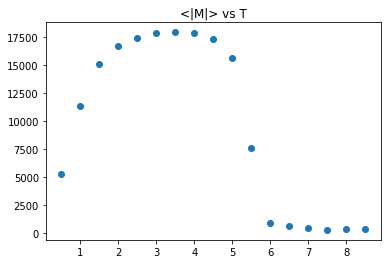

In [7]:
plot_mag_aves(180, 180, 0.5, 8.5, 0.5, 40, 20)

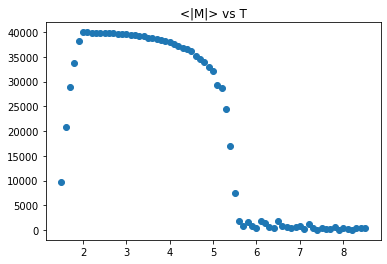

In [9]:
plot_mag_aves(200, 200, 1.5, 8.5, 0.1, 40, 1)

My approach to solving this problem was to create a 2D array that updates each value dependent on its surrounding values in an incremental pattern such that there is no top-left to bottom-right correlation. Then, as a result of the temperature value, a strong relationship with temperature should appear resulting in a high magnetization level that quickly drops off to zero as temperature increases. This, combined with material properties, would likely result in a good approximation of how magnetization occurs in different materials.